In [2]:
# Data analysis:
import pandas as pd
import csv
import numpy as np
import scipy.stats as stats

# Visualisation:
import seaborn as sns
import matplotlib.pyplot as plt
# import shap
%matplotlib inline

# Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

import shap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

# Scores:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder

In [3]:
imp_feat = ['stm_geo_mld', 'stm_prioriteit', 'stm_oorz_code', 'stm_progfh_in_duur', 
            "stm_progfh_gw_teller", 'stm_sap_meldtijd', "stm_fh_duur", "stm_progfh_gw_teller", 
       "stm_afspr_aanvangdd", "stm_afspr_func_hersteldd", "stm_afspr_aanvangtijd", 
       "stm_progfh_gw_duur", "stm_oorz_groep", "stm_geo_mld_uit_functiepl"]
#df[imp_feat]

In [ ]:
df_org = pd.read_csv('C:/Users/adam/OneDrive/Documenten/sap_storing_data_hu_project.csv', usecols=imp_feat, index_col=False, encoding='UTF-8')
df_org


In [805]:
dropped_columns = []
for i in df_org.columns:
    if df_org[i].isna().sum() > 100000:
        dropped_columns.append(i)
df_nan = df_org.drop(columns=dropped_columns)
df_nan

,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_prioriteit,stm_oorz_groep,stm_oorz_code,stm_sap_meldtijd,stm_progfh_in_duur,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_duur,stm_afspr_func_hersteldd
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,624.0,624.0,9.0,ONR-RIB,133.0,09:00:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,0.0,00/00/0000
2,201.0,201.0,9.0,ONR-DERD,143.0,12:35:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,51.0,00/00/0000
3,25.0,25.0,9.0,ONR-DERD,142.0,16:40:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,40.0,00/00/0000
4,12.0,12.0,9.0,ONR-DERD,142.0,22:30:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,6.0,00/00/0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865468,553,553.0,2.0,ONR-DERD,151.0,19:17:12,0,0.0,0.0,00/00/0000,00:00:00,163.0,00/00/0000
865469,553,553.0,2.0,ONR-DERD,151.0,19:17:12,0,0.0,0.0,00/00/0000,00:00:00,163.0,00/00/0000
865470,54,54.0,2.0,WEER,181.0,23:33:17,79415,0.0,2.0,00/00/0000,00:00:00,155.0,00/00/0000
865471,155,155.0,9.0,NaN,NaN,23:44:32,0,0.0,0.0,00/00/0000,00:00:00,5.0,00/00/0000


In [806]:
# De dubbele waardes worden verwijderd

df_nan.drop_duplicates(inplace=True)
df_nan

,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_prioriteit,stm_oorz_groep,stm_oorz_code,stm_sap_meldtijd,stm_progfh_in_duur,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_duur,stm_afspr_func_hersteldd
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,624.0,624.0,9.0,ONR-RIB,133.0,09:00:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,0.0,00/00/0000
2,201.0,201.0,9.0,ONR-DERD,143.0,12:35:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,51.0,00/00/0000
3,25.0,25.0,9.0,ONR-DERD,142.0,16:40:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,40.0,00/00/0000
4,12.0,12.0,9.0,ONR-DERD,142.0,22:30:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,6.0,00/00/0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865465,553,553.0,5.0,ONR-DERD,151.0,22:18:55,582,0.0,1.0,12/04/2018,02:00:01,521.0,12/04/2018
865467,553,553.0,2.0,ONR-DERD,151.0,19:17:12,0,0.0,0.0,00/00/0000,00:00:00,163.0,00/00/0000
865470,54,54.0,2.0,WEER,181.0,23:33:17,79415,0.0,2.0,00/00/0000,00:00:00,155.0,00/00/0000
865471,155,155.0,9.0,NaN,NaN,23:44:32,0,0.0,0.0,00/00/0000,00:00:00,5.0,00/00/0000


In [807]:
 df = df_nan.dropna()

df['stm_progfh_in_duur'] = pd.to_numeric(df['stm_progfh_in_duur'], errors='coerce')
df = df.dropna()
      
df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_prioriteit,stm_oorz_groep,stm_oorz_code,stm_sap_meldtijd,stm_progfh_in_duur,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_duur,stm_afspr_func_hersteldd
1,624.0,624.0,9.0,ONR-RIB,133.0,09:00:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,0.0,00/00/0000
2,201.0,201.0,9.0,ONR-DERD,143.0,12:35:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,51.0,00/00/0000
3,25.0,25.0,9.0,ONR-DERD,142.0,16:40:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,40.0,00/00/0000
4,12.0,12.0,9.0,ONR-DERD,142.0,22:30:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,6.0,00/00/0000
5,614.0,614.0,9.0,TECHONV,218.0,11:23:00,99999999.0,99999999.0,0.0,00/00/0000,00:00:00,7.0,00/00/0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865461,564,564.0,5.0,ONR-DERD,151.0,16:13:42,0.0,0.0,0.0,12/04/2018,13:00:00,1250.0,12/04/2018
865462,54,54.0,5.0,TECHONV,298.0,17:08:02,52.0,0.0,1.0,11/04/2018,17:08:02,15.0,14/04/2018
865465,553,553.0,5.0,ONR-DERD,151.0,22:18:55,582.0,0.0,1.0,12/04/2018,02:00:01,521.0,12/04/2018
865467,553,553.0,2.0,ONR-DERD,151.0,19:17:12,0.0,0.0,0.0,00/00/0000,00:00:00,163.0,00/00/0000


In [808]:
# le = preprocessing.LabelEncoder()
# le.fit([1, 2, 2, 6])
df["stm_progfh_in_duur"] = df["stm_progfh_in_duur"]+80
for i in df.columns:
    if df[i].dtype == object and i != "stm_sap_meldtijd":
        codes, uniques = pd.factorize(df[i])
        df[i] = codes
df

,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_prioriteit,stm_oorz_groep,stm_oorz_code,stm_sap_meldtijd,stm_progfh_in_duur,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_duur,stm_afspr_func_hersteldd
1,0,624.0,9.0,0,133.0,09:00:00,100000079.0,0,0.0,0,0,0.0,0
2,1,201.0,9.0,1,143.0,12:35:00,100000079.0,0,0.0,0,0,51.0,0
3,2,25.0,9.0,1,142.0,16:40:00,100000079.0,0,0.0,0,0,40.0,0
4,3,12.0,9.0,1,142.0,22:30:00,100000079.0,0,0.0,0,0,6.0,0
5,4,614.0,9.0,2,218.0,11:23:00,100000079.0,0,0.0,0,0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865461,116,564.0,5.0,1,151.0,16:13:42,80.0,2,0.0,707,61,1250.0,710
865462,31,54.0,5.0,2,298.0,17:08:02,132.0,2,1.0,705,14944,15.0,709
865465,54,553.0,5.0,1,151.0,22:18:55,662.0,2,1.0,707,259,521.0,710
865467,54,553.0,2.0,1,151.0,19:17:12,80.0,2,0.0,0,0,163.0,0


In [809]:
print(len(df['stm_geo_mld']))
df['stm_geo_mld'] = pd.to_numeric(df['stm_geo_mld'], errors='coerce')
df = df.dropna()
print(len(df['stm_geo_mld']))

591705
591705


In [810]:
# remove 0 values
df = df[df['stm_progfh_in_duur'] > 0 ]
df = df[df['stm_fh_duur'] > 0 ]

outlier_range = 1.3

q1=df['stm_fh_duur'].quantile(0.25)
q3=df['stm_fh_duur'].quantile(0.75)
IQR=q3-q1

df = df[~((df['stm_fh_duur']<(q1-outlier_range*IQR)) | (df['stm_fh_duur']>(q3+outlier_range*IQR)))]

# stm_progfh_in_duur
q1=df['stm_progfh_in_duur'].quantile(0.25)
q3=df['stm_progfh_in_duur'].quantile(0.75)
IQR=q3-q1

df = df[~((df['stm_progfh_in_duur']<(q1-outlier_range*IQR)) | (df['stm_progfh_in_duur']>(q3+outlier_range*IQR)))]


df

,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_prioriteit,stm_oorz_groep,stm_oorz_code,stm_sap_meldtijd,stm_progfh_in_duur,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_duur,stm_afspr_func_hersteldd
32099,70,104.0,9.0,2,299.0,20:50:00,120.0,0,0.0,0,0,43.0,0
52800,87,38.0,9.0,0,131.0,07:00:00,80.0,0,0.0,0,0,15.0,1
84560,47,23.0,9.0,2,299.0,18:48:00,80.0,0,0.0,0,0,7.0,0
86470,35,586.0,9.0,0,133.0,15:58:53,80.0,0,0.0,0,0,232.0,0
86879,55,119.0,9.0,0,133.0,12:37:33,80.0,0,0.0,0,0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865451,123,98.0,5.0,2,227.0,14:55:23,89.0,2,1.0,707,212,10.0,710
865455,73,120.0,5.0,2,223.0,16:15:47,214.0,2,1.0,705,13057,120.0,708
865462,31,54.0,5.0,2,298.0,17:08:02,132.0,2,1.0,705,14944,15.0,709
865465,54,553.0,5.0,1,151.0,22:18:55,662.0,2,1.0,707,259,521.0,710


In [811]:
condition_ochtend_spits = (df['stm_sap_meldtijd'] >= '06:30:00') & (df['stm_sap_meldtijd'] <= '09:00:00')
df['spits_ochtend'] = np.where(condition_ochtend_spits, 1, 0) 

condition_avond_spits = (df['stm_sap_meldtijd'] >= '16:00:00') & (df['stm_sap_meldtijd'] <= '18:30:00')
df['spits_avond'] = np.where(condition_avond_spits, 1, 0) 

condition_nacht = (df['stm_sap_meldtijd'] <= '06:30:00') | (df['stm_sap_meldtijd'] >= '22:00:00')
df['nacht'] = np.where(condition_nacht, 1, 0)

condition_overdag = (df['stm_sap_meldtijd'] >= '09:00:00') & (df['stm_sap_meldtijd'] <= '16:00:00')
df['overdag'] = np.where(condition_avond_spits, 1, 0) 

condition_overig1 = (df['stm_sap_meldtijd'] >= '18:30:00') & (df['stm_sap_meldtijd'] <= '22:00:00')
df['avond'] = np.where(condition_avond_spits, 1, 0) 
df

,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_prioriteit,stm_oorz_groep,stm_oorz_code,stm_sap_meldtijd,stm_progfh_in_duur,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_duur,stm_afspr_func_hersteldd,spits_ochtend,spits_avond,nacht,overdag,avond
32099,70,104.0,9.0,2,299.0,20:50:00,120.0,0,0.0,0,0,43.0,0,0,0,0,0,0
52800,87,38.0,9.0,0,131.0,07:00:00,80.0,0,0.0,0,0,15.0,1,1,0,0,0,0
84560,47,23.0,9.0,2,299.0,18:48:00,80.0,0,0.0,0,0,7.0,0,0,0,0,0,0
86470,35,586.0,9.0,0,133.0,15:58:53,80.0,0,0.0,0,0,232.0,0,0,0,0,0,0
86879,55,119.0,9.0,0,133.0,12:37:33,80.0,0,0.0,0,0,8.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865451,123,98.0,5.0,2,227.0,14:55:23,89.0,2,1.0,707,212,10.0,710,0,0,0,0,0
865455,73,120.0,5.0,2,223.0,16:15:47,214.0,2,1.0,705,13057,120.0,708,0,1,0,1,1
865462,31,54.0,5.0,2,298.0,17:08:02,132.0,2,1.0,705,14944,15.0,709,0,1,0,1,1
865465,54,553.0,5.0,1,151.0,22:18:55,662.0,2,1.0,707,259,521.0,710,0,0,1,0,0


In [812]:
print(df['stm_fh_duur'].max())
print(df['stm_progfh_in_duur'].max())


767.0
667.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


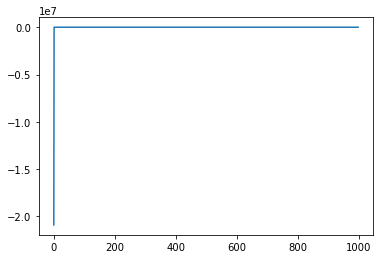

In [817]:
df = df_org.dropna()
df['stm_progfh_in_duur'] = pd.to_numeric(df['stm_progfh_in_duur'], errors='coerce')
df = df.dropna()

meds = []
for i in range(1, 999):
    print(i, end="\r")
    diff = df['stm_fh_duur'] - df['stm_progfh_in_duur']
    meds.append(sum(diff) / len(diff))
    df = df[df['stm_progfh_in_duur'] < 999 - i]
    df = df[df['stm_fh_duur'] < 999 - i]
    
plt.plot(meds)
plt.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


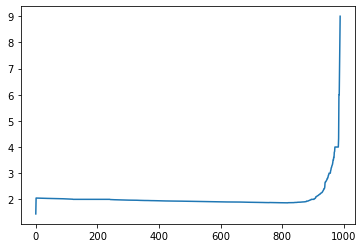

In [799]:
df = df_org.dropna()
df['stm_progfh_in_duur'] = pd.to_numeric(df['stm_progfh_in_duur'], errors='coerce')
df = df.dropna()

meds = []
for i in range(1, 999):
    print(i, end="\r")
    diff = (df['stm_fh_duur'] / df['stm_progfh_in_duur'])
    meds.append(diff.median())
    
    df = df[df['stm_progfh_in_duur'] < 999 - i]
    df = df[df['stm_fh_duur'] < 999 - i]
    
plt.plot(meds)
plt.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


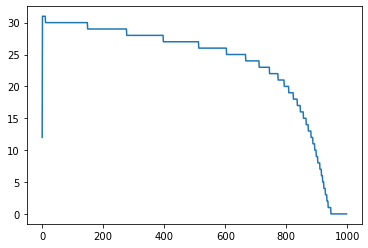

In [800]:
df = df_org.dropna()
df['stm_progfh_in_duur'] = pd.to_numeric(df['stm_progfh_in_duur'], errors='coerce')
df = df.dropna()

meds = []
for i in range(1, 999):
    print(i, end="\r")
    diff = (df['stm_fh_duur'] - df['stm_progfh_in_duur'])
    meds.append(diff.median())
    df = df[df['stm_progfh_in_duur'] < 999 - i]
    df = df[df['stm_fh_duur'] < 999 - i]
    
plt.plot(meds)
plt.show()

In [713]:
# Meet hoeveel correlatie er is tussen de target variable en elke feature variable
df.corr()['stm_fh_duur'].sort_values()[-10:]

stm_geo_mld_uit_functiepl    0.036439
stm_progfh_gw_duur           0.042592
stm_afspr_aanvangtijd        0.047372
stm_progfh_gw_teller         0.050269
stm_afspr_func_hersteldd     0.143369
nacht                        0.147441
stm_afspr_aanvangdd          0.152174
stm_prioriteit               0.300417
stm_progfh_in_duur           0.423211
stm_fh_duur                  1.000000
Name: stm_fh_duur, dtype: float64

['stm_geo_mld', 'stm_prioriteit', 'stm_oorz_code', 'stm_progfh_in_duur', 'stm_progfh_gw_teller', 'stm_sap_meldtijd', 'stm_fh_duur', 'stm_progfh_gw_teller', 'stm_afspr_aanvangdd', 'stm_afspr_func_hersteldd', 'stm_afspr_aanvangtijd', 'stm_progfh_gw_duur', 'stm_oorz_groep', 'stm_geo_mld_uit_functiepl', 'stm_fh_duur']


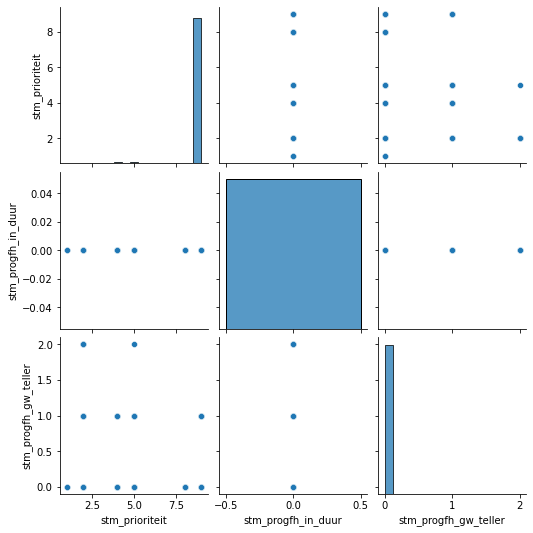

In [804]:

lst = imp_feat + ['stm_fh_duur']
print(lst)
sns.pairplot(df[['stm_prioriteit', 'stm_progfh_in_duur', "stm_progfh_gw_teller",
       "stm_afspr_aanvangdd", "stm_afspr_func_hersteldd", "stm_afspr_aanvangtijd"]])



In [773]:

average = sum(df['stm_fh_duur']) / len(df['stm_fh_duur'])
baseline = [average] * len(df['stm_fh_duur'])
np.sqrt(mean_squared_error(df['stm_fh_duur'], baseline))

163.05676072504508

In [774]:
median = df['stm_fh_duur'].median()
baseline = [median] * len(df['stm_fh_duur'])
np.sqrt(mean_squared_error(df['stm_fh_duur'], baseline))

172.86487657117462

In [775]:

print(np.sqrt(mean_squared_error(df['stm_fh_duur'], df['stm_progfh_in_duur'])))


173.97600973642318


32099       3.0
52800      15.0
84560       7.0
86470     232.0
86879       8.0
          ...  
865451      1.0
865455    -14.0
865462    -37.0
865465    -61.0
865467    163.0
Length: 329314, dtype: float64
39.0
767.0
78.13499274248893


<BarContainer object of 1000 artists>

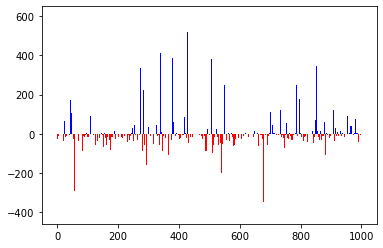

In [815]:

diff = (df['stm_fh_duur'] - df['stm_progfh_in_duur'])
print(diff)
print(diff.median())
print(diff.max())
print(sum(diff) / len(diff))


rs = 7384 + 100
fig = plt.figure()
ax = plt.subplot(111)
mask1 = np.array(diff[rs:rs + 1000])*np.array(diff[rs:rs + 1000] < 0)
mask2 = np.array(diff[rs:rs + 1000])*np.array(diff[rs:rs + 1000] >= 0)

ax.bar(range(len(mask1)), mask1, width=1, color='r')
ax.bar(range(len(mask2)), mask2, width=1, color='b')

#ax.bar(range(len(diff[rs:rs + 100][mask2])), diff[rs:rs + 100][mask2], width=1, color='b')

# for i in range(10):
#     range_start = 7384 + (i*200)
#     plt.plot(diff[range_start:range_start + 100])
#     plt.show()


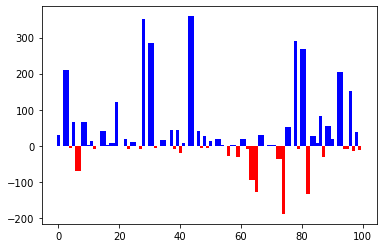

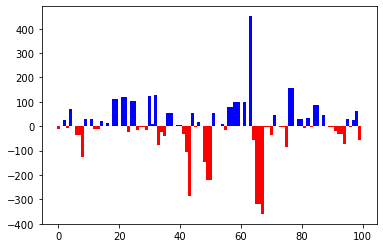

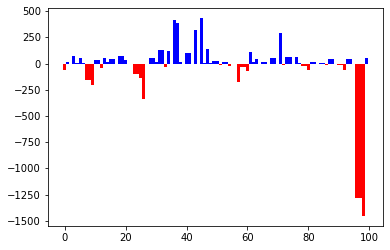

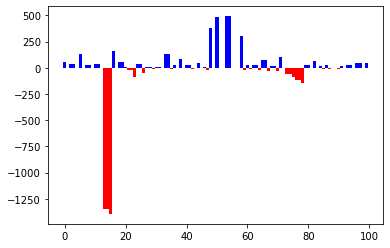

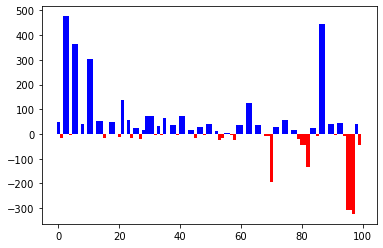

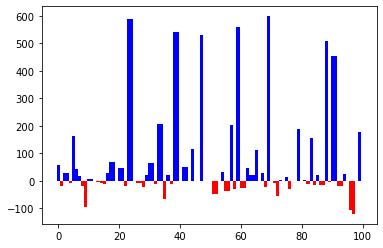

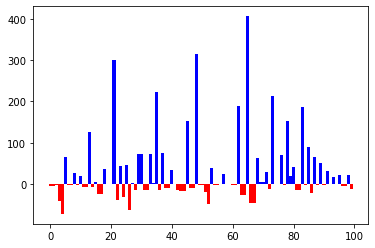

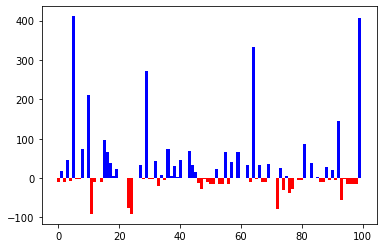

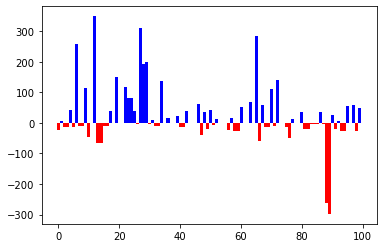

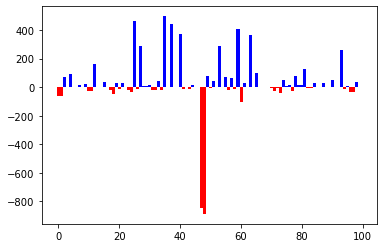

In [429]:
diff = (df['stm_fh_duur'] - df['stm_progfh_in_duur'])
for i in range(10):
    rs = 7384 + i*100
    fig = plt.figure()
    ax = plt.subplot(111)
    mask1 = np.array(diff[rs:rs + 100])*np.array(diff[rs:rs + 100] < 0)
    mask2 = np.array(diff[rs:rs + 100])*np.array(diff[rs:rs + 100] >= 0)

    ax.bar(range(len(mask1)), mask1, width=1, color='r')
    ax.bar(range(len(mask2)), mask2, width=1, color='b')

0.0
44.134164686493946


<BarContainer object of 100 artists>

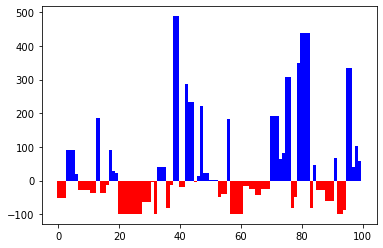

In [428]:

diff = (df['stm_fh_duur'] - baseline)
print(diff.median())
print(sum(diff) / len(diff))


rs = 334 
fig = plt.figure()
ax = plt.subplot(111)
mask1 = np.array(diff[rs:rs + 100])*np.array(diff[rs:rs + 100] < 0)
mask2 = np.array(diff[rs:rs + 100])*np.array(diff[rs:rs + 100] >= 0)

ax.bar(range(len(mask1)), mask1, width=1, color='r')
ax.bar(range(len(mask2)), mask2, width=1, color='b')

In [758]:
"""Seperate the dataset into its label (y) and input data (X)"""
# stm_geo_mld_uit_functiepl    0.034519
# stm_progfh_gw_duur           0.039121
# stm_progfh_gw_teller         0.045400
# stm_afspr_aanvangtijd        0.046547
# nacht                        0.129127
# stm_afspr_func_hersteldd     0.140974
# stm_afspr_aanvangdd          0.151620
# stm_prioriteit               0.306757
# stm_progfh_in_duur           0.410823
# stm_fh_duur                  1.000000


X = df[['stm_prioriteit', 'stm_progfh_in_duur', "stm_progfh_gw_teller", "nacht",
       "stm_afspr_aanvangdd", "stm_afspr_func_hersteldd", "stm_afspr_aanvangtijd"]].values
# X = df.drop(['stm_fh_duur'], axis='columns')
y = df['stm_fh_duur'].values
print("Labels:\n {} \n".format(y))
print("Training data: \n {} \n".format(X))


Labels:
 [ 43. 236. 593. ... 120.  15. 521.] 

Training data: 
 [[9.0000e+00 1.2000e+02 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.0000e+00 3.7300e+02 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.0000e+00 2.6000e+02 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [5.0000e+00 2.1400e+02 1.0000e+00 ... 7.0500e+02 7.0800e+02 1.3057e+04]
 [5.0000e+00 1.3200e+02 1.0000e+00 ... 7.0500e+02 7.0900e+02 1.4944e+04]
 [5.0000e+00 6.6200e+02 1.0000e+00 ... 7.0700e+02 7.1000e+02 2.5900e+02]] 



In [767]:
"""Split the data into train and test data, the test data is 20% of the entire dataset."""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=3)
print("Size of test dataset: {}".format(len(X_test)))
print("Size of train dataset: {}".format(len(X_train)))

Size of test dataset: 60633
Size of train dataset: 242528


In [766]:
# Instance and fit
neigh = KNeighborsRegressor(n_neighbors=9, weights='distance')
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)

print("Score of the model: {}".format(score))
np.sqrt(mean_squared_error(y_test, neigh.predict(X_test)))

Score of the model: 0.32178273927768164


135.04770754464167

In [816]:
# Predictions
preds = neigh.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': preds - y_test})

# View
print("Amount precisely 0.0 error:", len(performance[performance["Error"] == 0]))

performance


Amount precisely 0.0 error: 4581


,True Value,Prediction,Error
0,3.0,210.444444,207.444444
1,289.0,285.718884,-3.281116
2,42.0,80.000000,38.000000
3,222.0,94.000000,-128.000000
4,107.0,211.999931,104.999931
...,...,...,...
60628,20.0,21.285714,1.285714
60629,249.0,186.000000,-63.000000
60630,91.0,91.666667,0.666667
60631,51.0,47.777778,-3.222222


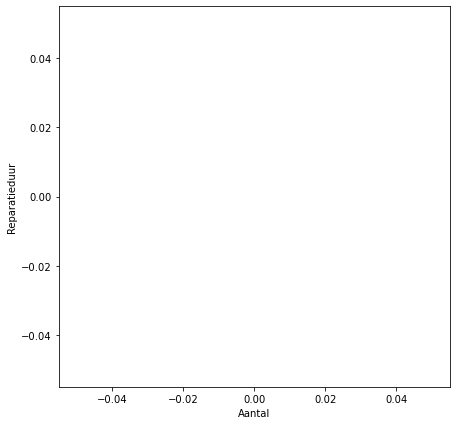

In [461]:

plt.figure(figsize=(7,7))
plt.xlabel('Aantal')
plt.ylabel('Reparatieduur')
fig = sns.scatterplot(data=df_org, x='stm_fh_duur', y=df['stm_fh_duur'].value_counts())


In [787]:
for i in range(1, 999):
    